In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML/ML review/FINAL PROJECT/Problem3_Energy.csv')
df.head(10)

,Date,Hour,Amount
0,01.01.2021,0:00,"29.489,46"
1,01.01.2021,1:00,"28.067,11"
2,01.01.2021,2:00,"26.527,08"
3,01.01.2021,3:00,"25.327,19"
4,01.01.2021,4:00,"24.719,72"
5,01.01.2021,5:00,"24.627,81"
6,01.01.2021,6:00,"24.690,18"
7,01.01.2021,7:00,"24.984,26"
8,01.01.2021,8:00,"25.185,19"
9,01.01.2021,9:00,"26.636,81"


In [ ]:
# Replace '.' with '' (remove thousand separator) and ',' with '.' (decimal format)
df['Amount'] = df['Amount'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)

# Convert to float
df['Amount'] = df['Amount'].astype(float)

# Verify the transformation
df['Amount'].head(10)

,Amount
0,29489.46
1,28067.11
2,26527.08
3,25327.19
4,24719.72
5,24627.81
6,24690.18
7,24984.26
8,25185.19
9,26636.81


In [ ]:
# Combine Date and Hour into a single datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Hour'], format='%d.%m.%Y %H:%M')

# Set as index for time-series analysis
df.set_index('Datetime', inplace=True)

# Drop the old Date and Hour columns
df.drop(columns=['Date', 'Hour'], inplace=True)

# Verify the transformation
print(df.head())

                       Amount
Datetime                     
2021-01-01 00:00:00  29489.46
2021-01-01 01:00:00  28067.11
2021-01-01 02:00:00  26527.08
2021-01-01 03:00:00  25327.19
2021-01-01 04:00:00  24719.72


In [ ]:
pip install prophet

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4o2cg09z/ylp5re4l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4o2cg09z/a1xjk4wn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53142', 'data', 'file=/tmp/tmp4o2cg09z/ylp5re4l.json', 'init=/tmp/tmp4o2cg09z/a1xjk4wn.json', 'output', 'file=/tmp/tmp4o2cg09z/prophet_modelz4ftgspr/prophet_model-20250101092602.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:26:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:26:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


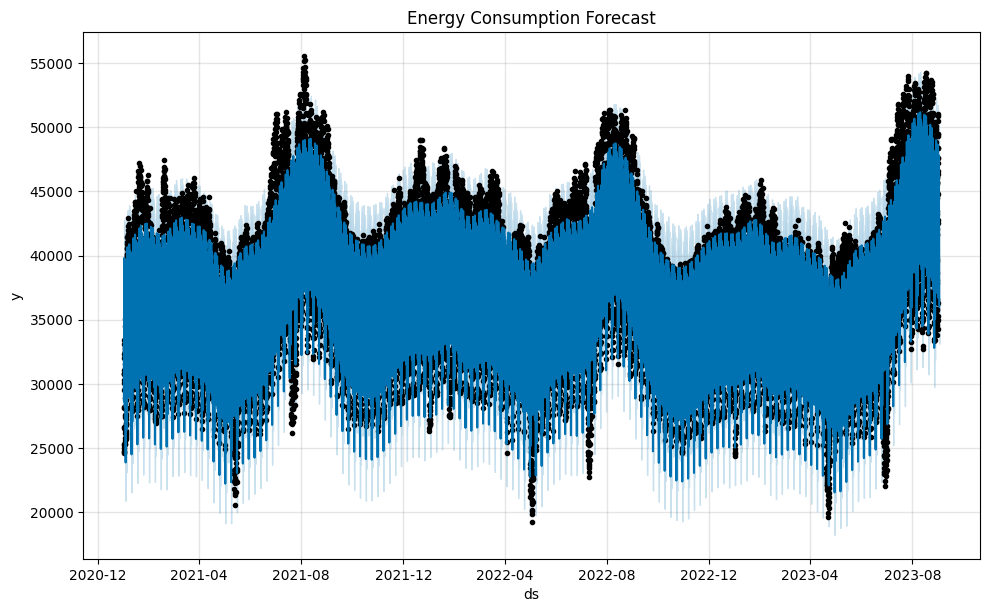

In [ ]:
from prophet import Prophet

# Prepare the data for Prophet
prophet_data = df.reset_index()[['Datetime', 'Amount']]
prophet_data.columns = ['ds', 'y']  # Prophet requires columns 'ds' (datetime) and 'y' (target variable)

# Initialize and fit the model
model = Prophet()
model.fit(prophet_data)

# Make future predictions (e.g., 30 days ahead)
future = model.make_future_dataframe(periods=30, freq='H')  # Predict hourly data for 30 days
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)
plt.title("Energy Consumption Forecast")
plt.show()


The Prophet model was implemented to forecast energy consumption trends. The results indicate that the model performs well in capturing long-term trends and seasonality patterns, but there are some limitations that need improvement.


The model effectively identifies recurring energy consumption cycles, including seasonal peaks and troughs, reflecting stable long-term trends.

The intervals widen slightly as the forecast horizon extends but remain consistent overall.



DEBUG:cmdstanpy:input tempfile: /tmp/tmp4o2cg09z/j14g1tvn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4o2cg09z/2qxtxro3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56459', 'data', 'file=/tmp/tmp4o2cg09z/j14g1tvn.json', 'init=/tmp/tmp4o2cg09z/2qxtxro3.json', 'output', 'file=/tmp/tmp4o2cg09z/prophet_modelohdafddb/prophet_model-20250101100527.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:05:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:06:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


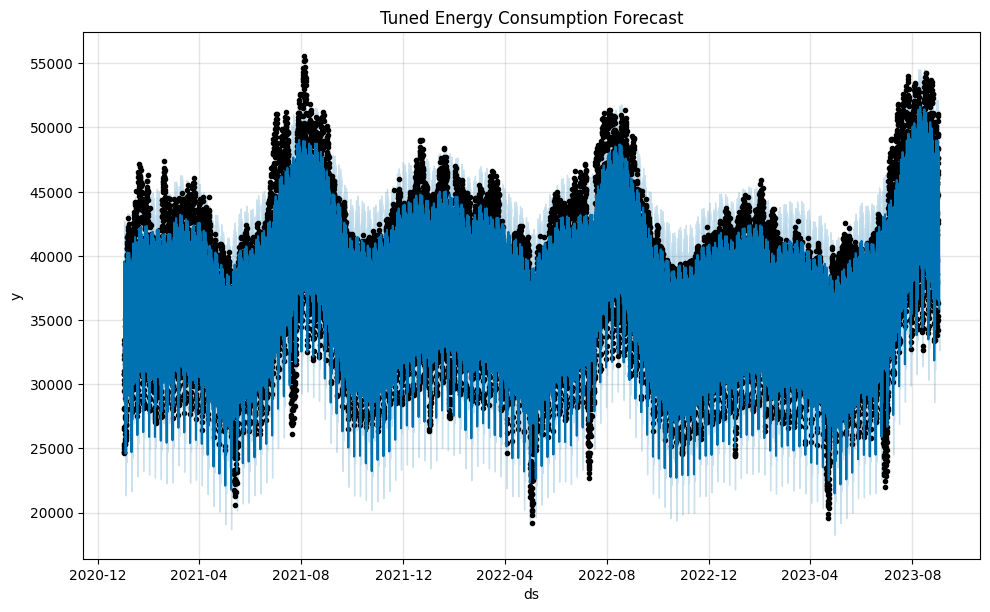

In [ ]:
model = Prophet(
    seasonality_mode='multiplicative',
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True
)
model.add_seasonality(name='hourly', period=24, fourier_order=3)
model.fit(prophet_data)

# Predict and plot
forecast = model.predict(future)
model.plot(forecast)
plt.title("Tuned Energy Consumption Forecast")
plt.show()


After tuning, the model provides a more accurate and detailed forecast, especially for daily and hourly variations, while maintaining reliable long-term trend predictions. However, further improvements could focus on addressing short-term anomalies and incorporating external factors.